# Week 11 Seminar Answers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

## Question 1

In [2]:
def newton_vol_put(S, K, T, P, r, q):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #C: Call value
    #r: risk free rate
    #sigma: volatility of underlying asset
   
    MAX_ITERATIONS = 100
    tolerance = 0.00000001
    
    sigma = 0.25
    
    for i in range(0, MAX_ITERATIONS):
        d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        price = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
        vega = S * np.sqrt(T) * si.norm.pdf(d1, 0.0, 1.0)

        diff = P - price

        if (abs(diff) < tolerance):
            return sigma
        else: 
            sigma = sigma + diff/vega
        
        print(i,sigma,diff)
        
    return sigma

## Question 2

In [3]:
impvol = newton_vol_put(189.97, 200, 1/12, 6, 0.0353, 0.0062)
print('The implied volatility is', round(impvol*100,2) , '% for the one-month call with strike $ 150' ) 

0 0.4680923343442822 3.897504516940799
1 0.4474154106402616 -0.43355857223339456
2 0.4473556538740012 -0.001245627515487513
3 0.447355653327641 -1.1388650023036462e-08
The implied volatility is 44.74 % for the one-month call with strike $ 150


## Question 3

In [4]:
AAPL = yf.Ticker("AAPL")
opt = AAPL.option_chain('2024-01-05')
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL240105P00130000,2023-11-24 17:06:23+00:00,130.0,0.05,0.0,0.0,0.0,0.0,2.0,2,0.250007,False,REGULAR,USD
1,AAPL240105P00135000,2023-11-22 16:16:16+00:00,135.0,0.10,0.0,0.0,0.0,0.0,NaN,10,0.250007,False,REGULAR,USD
2,AAPL240105P00140000,2023-11-24 15:01:23+00:00,140.0,0.10,0.0,0.0,0.0,0.0,35.0,35,0.250007,False,REGULAR,USD
3,AAPL240105P00145000,2023-11-24 16:23:07+00:00,145.0,0.12,0.0,0.0,0.0,0.0,1.0,3,0.125009,False,REGULAR,USD
4,AAPL240105P00155000,2023-11-24 17:17:03+00:00,155.0,0.17,0.0,0.0,0.0,0.0,1.0,1,0.125009,False,REGULAR,USD
5,AAPL240105P00160000,2023-11-24 17:06:23+00:00,160.0,0.23,0.0,0.0,0.0,0.0,13.0,15,0.125009,False,REGULAR,USD
6,AAPL240105P00165000,2023-11-24 17:37:30+00:00,165.0,0.29,0.0,0.0,0.0,0.0,14.0,57,0.125009,False,REGULAR,USD
7,AAPL240105P00170000,2023-11-24 17:49:51+00:00,170.0,0.41,0.0,0.0,0.0,0.0,32.0,27,0.062509,False,REGULAR,USD
8,AAPL240105P00175000,2023-11-24 17:58:48+00:00,175.0,0.60,0.0,0.0,0.0,0.0,82.0,86,0.062509,False,REGULAR,USD
9,AAPL240105P00180000,2023-11-24 17:53:52+00:00,180.0,1.10,0.0,0.0,0.0,0.0,243.0,306,0.031260,False,REGULAR,USD


In [5]:
import mibian

In [6]:
impliedvol = np.zeros((len(opt.puts.strike),1))
for i in range(len(opt.puts.strike)):
    p = mibian.BS([189.97, opt.puts.strike[i], 3.53, 0.62, 31], putPrice = opt.puts.lastPrice[i])
    impliedvol [i] = p.impliedVolatility

Text(0.5, 1.0, 'Volatility Smile/Skew')

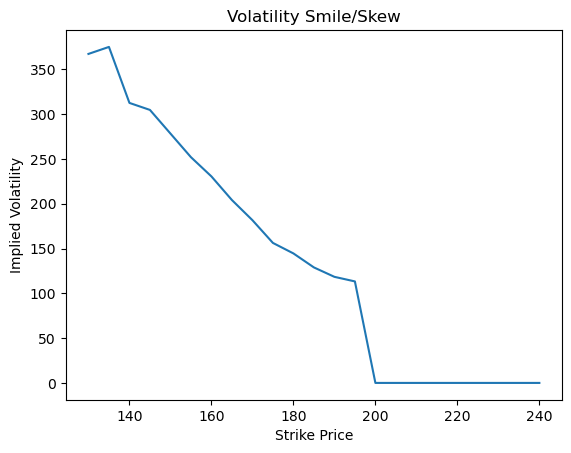

In [7]:
fig = plt.figure()
plt.plot(opt.puts.strike, impliedvol, '-')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile/Skew')

## Quetion 4

Text(0.5, 1.0, 'Volatility Smile/Skew')

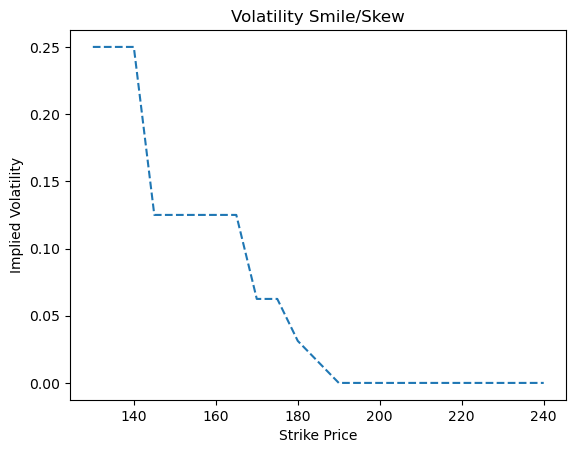

In [8]:
fig = plt.figure()
plt.plot(opt.puts.strike, opt.puts.impliedVolatility, '--')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile/Skew')

## Question 5

In [9]:
difference = np.zeros((len(opt.puts.strike),1))
for i in range(len(opt.puts.strike)):
    difference[i] = impliedvol[i] - opt.puts.impliedVolatility[i]*100

Text(0.5, 1.0, 'Volatility Smile/Skew')

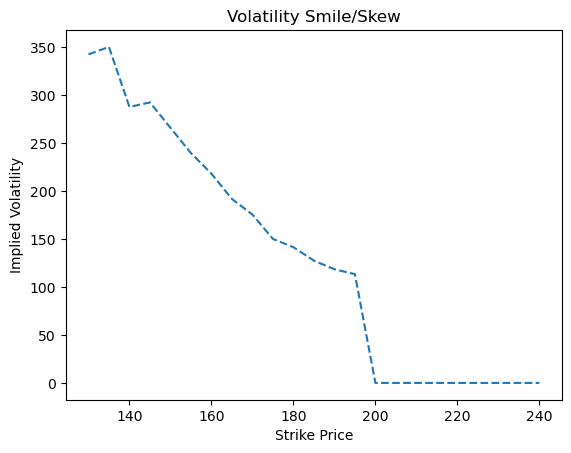

In [10]:
fig = plt.figure()
plt.plot(opt.puts.strike, difference, '--')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile/Skew')

In [11]:
pp = mibian.BS([189.97, 200, 3.53, 0.62, 31], putPrice = 6)
pp.impliedVolatility

1e-05

## Question 6

In [12]:
import arrow
T = ['2023-12-01', '2023-12-08', '2023-12-15', '2023-12-22', '2023-12-29', '2024-01-05', '2024-01-19', '2024-02-16', 
     '2024-03-15', '2024-04-19', '2024-06-21', '2024-07-19', '2024-09-20', '2024-12-20', '2025-01-17', '2025-06-20', 
     '2025-09-19', '2025-12-19', '2026-01-16']

In [13]:
K = np.linspace(170.00,190.00,3)
now = arrow.get('2023-11-25')
days = np.zeros((len(T),1))
impliedvol_s = np.zeros((len(K),len(days)))
for j in range(len(days)):
    for i in range(len(K)):
        opt = AAPL.option_chain(T[j])
        temp = arrow.get(T[j])
        delta = temp - now
        days[j] = delta.days
        impliedvol_s [i,j] = opt.puts.impliedVolatility[opt.puts.strike == K[i]]
        

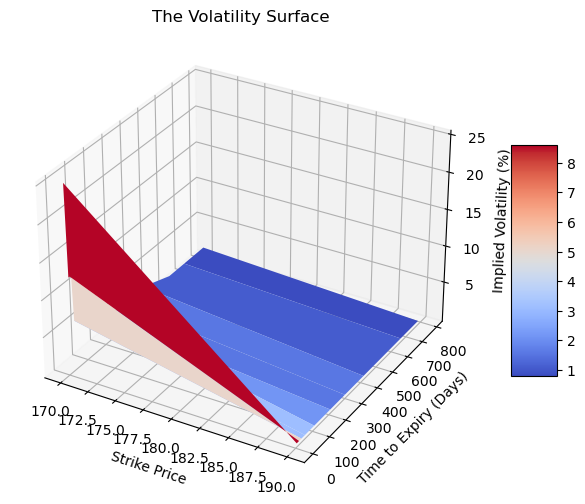

In [14]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
K, days = np.meshgrid(K, days)
surf = ax.plot_surface(K, days, impliedvol_s.T*100, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Strike Price')
ax.set_ylabel('Time to Expiry (Days)')
ax.set_zlabel('Implied Volatility (%)')
plt.title('The Volatility Surface')
fig.colorbar(surf, shrink=0.5, aspect=5);